In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

<h2>Load the Dataset</h2>

In [2]:
df=pd.read_csv("C:\second year\projects 3rd year\Data Analysis Excel\zomato.csv")

<h2>Get to know the dataset</h2>

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


<h2>Pre-processing:</h2>


In [6]:
df.columns=df.columns.str.strip().str.lower().str.replace(r'[^\w\s]', '',regex=True) .str.replace(' ','_',regex=False)

In [7]:
df.head()

,unnamed_01,unnamed_0,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [8]:
df['unnamed_01'].equals(df['unnamed_0'])

True

In [9]:
df.drop(columns=['unnamed_01','unnamed_0'],inplace=True)

In [10]:
df.head()

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [11]:
df['restaurant_name']=df['restaurant_name'].apply(lambda x:re.sub(r"[^\w\s]",' ',x).strip().title())

In [12]:
df.head()

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
0,Feeltheroll,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,L 81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,Refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [13]:
df.sample(20)

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
450,Arzak,"Takeaway, Delivery",2.8,40,300.0,No,No,"Arabian, Middle Eastern, Rolls, Seafood, BBQ",Electronic City,Electronic City
6630,Thrupthi Restaurant,Quick Bites,3.4,15,150.0,No,No,Kerala,Bannerghatta Road,Bannerghatta Road
5909,Sufi Restaurant Cafe,Casual Dining,3.7,105,800.0,Yes,No,"Iranian, Mughlai, Chinese",Kalyan Nagar,Banaswadi
164,Agraharam Meal,"Takeaway, Delivery",3.7,61,300.0,No,No,"North Indian, South Indian",Marathahalli,Kaggadasapura
6947,Welcomcafe Jacaranda Welcomhotel Bengaluru,Fine Dining,3.9,53,2000.0,No,No,"Asian, Continental, North Indian",Brigade Road,Richmond Road
3910,Mesa Deli Svenska Design Hotel,Casual Dining,3.2,9,600.0,Yes,Yes,"North Indian, Italian",Electronic City,Electronic City
2174,Food Court,Quick Bites,3.3,4,300.0,No,No,"South Indian, North Indian, Chinese, Street Food",Lavelle Road,Majestic
3447,Kulcha Kulture,Delivery,3.4,13,400.0,Yes,No,North Indian,Indiranagar,Indiranagar
6291,The Chocolate Room,Cafe,2.8,43,600.0,Yes,No,"Cafe, Beverages",Electronic City,Electronic City
6549,The Square Novotel,Fine Dining,4.3,760,2500.0,No,Yes,"Continental, North Indian, Japanese, Italian",Bellandur,Marathahalli


In [14]:
df=df.apply(lambda x:x.str.strip().str.title() if x.dtype=='object' else x)

In [15]:
df.head()

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
0,Feeltheroll,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,L 81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",Hsr
2,Refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"Bbq, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


<h2>Check NULL and Duplicates</h2>

In [16]:
df.isnull().sum()

restaurant_name         0
restaurant_type         0
rate_out_of_5          68
num_of_ratings          0
avg_cost_two_people    57
online_order            0
table_booking           0
cuisines_type           0
area                    0
local_address           0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df['restaurant_name'].nunique()

7099

<h2>Handle null values using median imputation</h2>

In [27]:
df['rate_out_of_5'].median()

3.5

In [28]:
df['rate_out_of_5'].mean()

3.5142532329117526

In [29]:
df['avg_cost_two_people'].median()

400.0

In [30]:
df['avg_cost_two_people'].mean()

540.2864642451759

<h2>Median Imputation</h2>

In [31]:
df['rate_out_of_5'].fillna(df['rate_out_of_5'].median(),inplace=True)

In [32]:
df['avg_cost_two_people'].fillna(df['avg_cost_two_people'].median(),inplace=True)

In [33]:
df.isnull().sum()

restaurant_name        0
restaurant_type        0
rate_out_of_5          0
num_of_ratings         0
avg_cost_two_people    0
online_order           0
table_booking          0
cuisines_type          0
area                   0
local_address          0
dtype: int64

<h2>Histograms for understanding data distribution</h2>

C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate_out_of_5', ylabel='Count'>

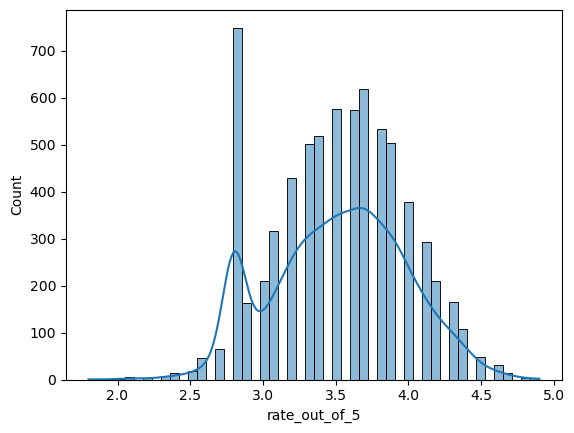

In [34]:
sns.histplot(df['rate_out_of_5'],kde=True)

C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_cost_two_people', ylabel='Count'>

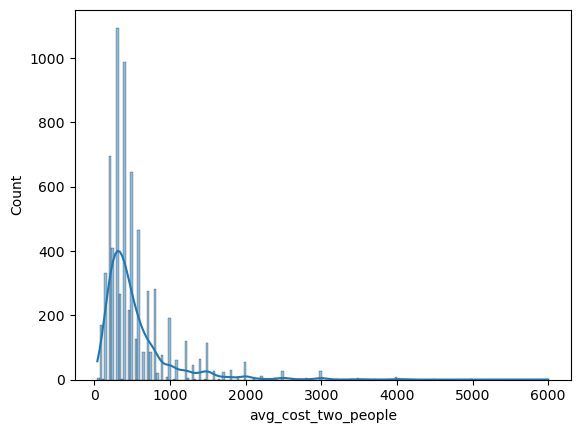

In [35]:
sns.histplot(df['avg_cost_two_people'],kde=True)

C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_ratings', ylabel='Count'>

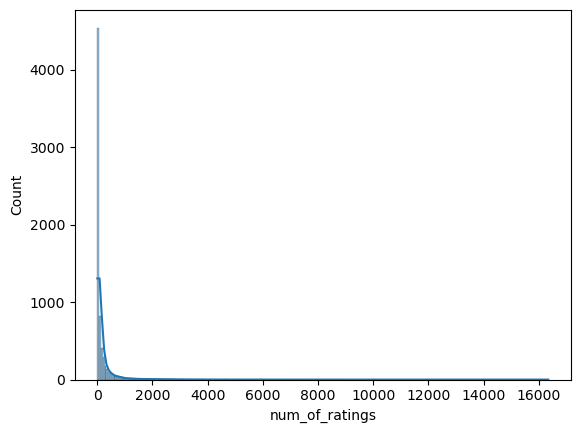

In [36]:
sns.histplot(df['num_of_ratings'],bins=250,kde=True)

<h2>Identifying worst and top performing restaurants by rate_out_of_5</h2>

<Axes: >

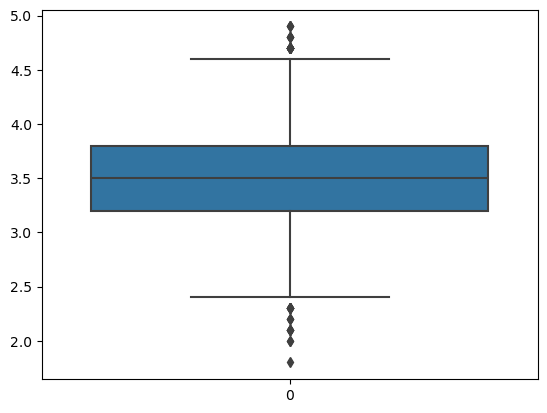

In [29]:
sns.boxplot(df["rate_out_of_5"])

In [37]:
def find_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"lower bound for {col} is {lower_bound}")
    print(f"Upper bound for {col} is {upper_bound}")
    



find_outliers_iqr(df,"rate_out_of_5")

lower bound for rate_out_of_5 is 2.3000000000000007
Upper bound for rate_out_of_5 is 4.699999999999999


<h2>Genuine business insights so outlier handling not required for rate_out_of_5 column.</h2>

In [45]:
poor_performing_restaurants=df[(df["rate_out_of_5"]>=1.8) & (df["rate_out_of_5"]<=2.3)][["restaurant_name","rate_out_of_5"]].sort_values(by="rate_out_of_5") #ascending=True by default

In [46]:
poor_performing_restaurants.head()

,restaurant_name,rate_out_of_5
231,Alibi Maya International Hotel,1.8
708,Bhagini,2.0
2296,Fusion Lounge,2.0
527,Bageecha,2.1
1739,Decker S Lane,2.1


In [47]:
top_performing_restaurants=df[(df["rate_out_of_5"]>=4.6) & (df["rate_out_of_5"]<=4.9)][["restaurant_name","rate_out_of_5","restaurant_type","cuisines_type","online_order","table_booking","area","local_address"]].sort_values(by="rate_out_of_5",ascending=False)

In [48]:
top_performing_restaurants.head()

,restaurant_name,rate_out_of_5,restaurant_type,cuisines_type,online_order,table_booking,area,local_address
1035,Byg Brewski Brewing Company,4.9,Microbrewery,"Continental, North Indian, Italian, South Indi...",Yes,Yes,Bellandur,Sarjapur Road
5271,Santã Â Ã Â Ã Â Ã Â Ã Â Ã Â Ã Â Ã Â Ã Â Ã Â Ã ...,4.9,Casual Dining,"Healthy Food, Salad, Mediterranean",No,Yes,Old Airport Road,Indiranagar
466,Asia Kitchen By Mainland China,4.9,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",Yes,Yes,"Byresandra,Tavarekere,Madiwala",Koramangala 5Th Block
4444,O G Variar Sons,4.8,Bakery,"Bakery, Desserts",No,No,Malleshwaram,Rajajinagar
6496,The Pizza Bakery,4.8,Casual Dining,"Italian, Pizza, Beverages",Yes,Yes,Indiranagar,Indiranagar


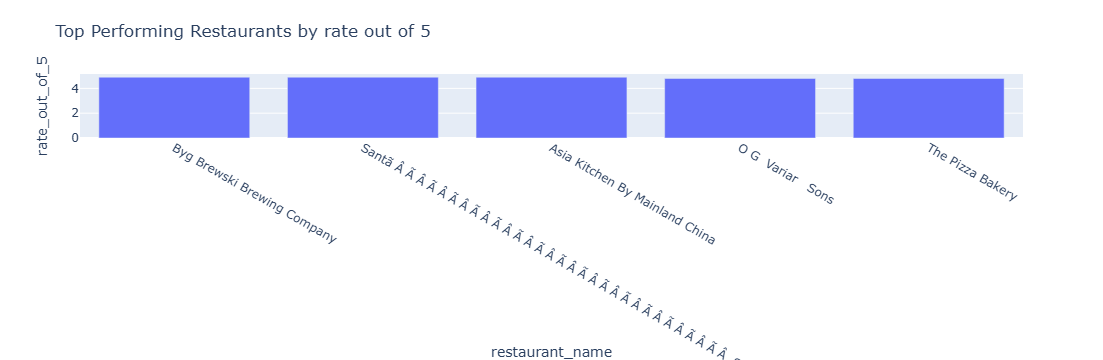

In [49]:
top_performing_restaurants_graph=top_performing_restaurants[["restaurant_name","rate_out_of_5","restaurant_type","cuisines_type"]].head()
px.bar(top_performing_restaurants_graph,x="restaurant_name",y="rate_out_of_5",title="Top Performing Restaurants by rate out of 5")

In [50]:
df['num_of_ratings'].median()

40.0

In [51]:
df['num_of_ratings'].mean()

188.9210415200563

<Axes: xlabel='num_of_ratings'>

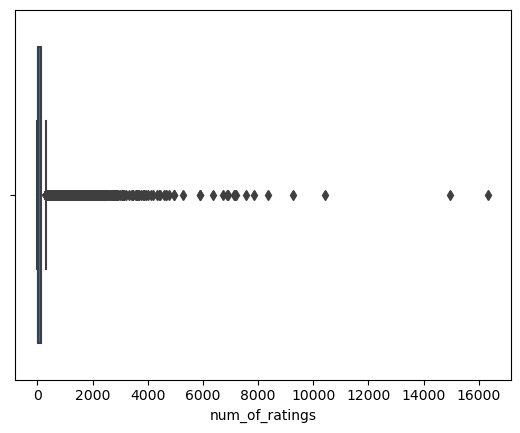

In [52]:
sns.boxplot(x=df['num_of_ratings'])

In [53]:
find_outliers_iqr(df,'num_of_ratings')

lower bound for num_of_ratings is -152.0
Upper bound for num_of_ratings is 296.0


In [54]:
len(df[df['num_of_ratings']>296])

942

In [55]:
len(df[(df['num_of_ratings']<4000) & (df['num_of_ratings']>296)])

914

In [56]:
top_performing_rest=df.sort_values(by="num_of_ratings",ascending=False)
top_performing_rest[["restaurant_name","num_of_ratings","restaurant_type","cuisines_type","online_order","table_booking","area","local_address"]].head()

,restaurant_name,num_of_ratings,restaurant_type,cuisines_type,online_order,table_booking,area,local_address
1035,Byg Brewski Brewing Company,16345,Microbrewery,"Continental, North Indian, Italian, South Indi...",Yes,Yes,Bellandur,Sarjapur Road
6665,Toit,14956,Microbrewery,"Italian, American, Pizza",No,No,Indiranagar,Indiranagar
6242,The Black Pearl,10413,"Casual Dining, Bar","North Indian, European, Mediterranean",No,Yes,"Byresandra,Tavarekere,Madiwala",Koramangala 5Th Block
770,Big Pitcher,9272,"Pub, Microbrewery","American, Continental, North Indian, Mediterra...",No,Yes,Old Airport Road,Old Airport Road
423,Arbor Brewing Company,8375,"Pub, Microbrewery","American, Continental, Salad",No,Yes,Brigade Road,Brigade Road


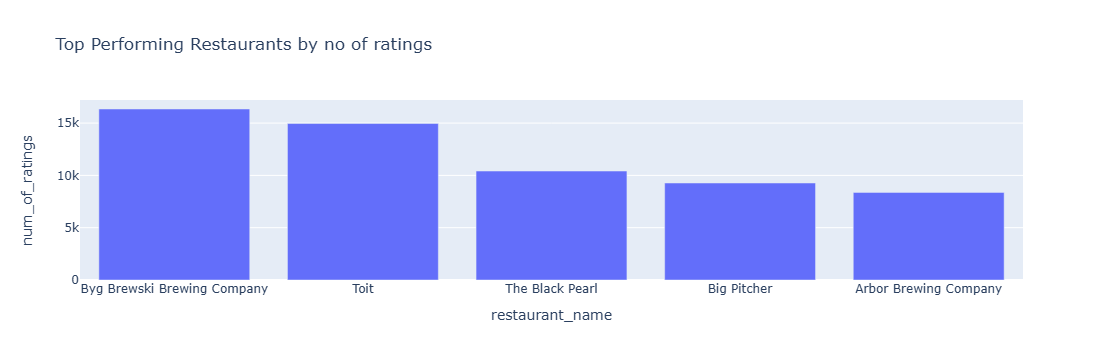

In [57]:
top_performing_rest_graph=top_performing_rest[["restaurant_name","num_of_ratings","restaurant_type","cuisines_type"]].head()
px.bar(top_performing_rest_graph,x="restaurant_name",y="num_of_ratings",title="Top Performing Restaurants by no of ratings")

<Axes: xlabel='avg_cost_two_people'>

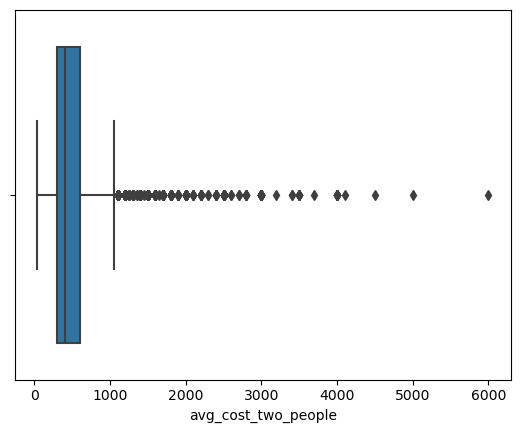

In [58]:
sns.boxplot(x=df['avg_cost_two_people'])

In [59]:
find_outliers_iqr(df,'avg_cost_two_people')

lower bound for avg_cost_two_people is -150.0
Upper bound for avg_cost_two_people is 1050.0


In [60]:
len(df[df['avg_cost_two_people']>1050])

661

<h2>Visualization</h2>

<h2>1.Popularity</h2>

In [66]:
df['popularity_score'] = df['rate_out_of_5'] * np.log1p(df['num_of_ratings'])

popular_score_df = df.sort_values(by='popularity_score', ascending=False)


In [67]:
popular_score_df.head(70)


,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address,popularity_score
1035,Byg Brewski Brewing Company,Microbrewery,4.9,16345,1600.0,Yes,Yes,"Continental, North Indian, Italian, South Indi...",Bellandur,Sarjapur Road,47.538519
6665,Toit,Microbrewery,4.7,14956,1500.0,No,No,"Italian, American, Pizza",Indiranagar,Indiranagar,45.180793
6242,The Black Pearl,"Casual Dining, Bar",4.7,10413,1400.0,No,Yes,"North Indian, European, Mediterranean","Byresandra,Tavarekere,Madiwala",Koramangala 5Th Block,43.479260
770,Big Pitcher,"Pub, Microbrewery",4.6,9272,1800.0,No,Yes,"American, Continental, North Indian, Mediterra...",Old Airport Road,Old Airport Road,42.020366
2149,Flechazo,Casual Dining,4.7,7154,1400.0,No,Yes,"Asian, Mediterranean, North Indian, Bbq",Marathahalli,Marathahalli,41.715163
...,...,...,...,...,...,...,...,...,...,...,...
3764,Mamagoto,Casual Dining,4.4,2558,1600.0,Yes,Yes,"Asian, Thai, Chinese, Bbq, Momos",Indiranagar,Indiranagar,34.528436
1746,Deja Vu Resto Bar,Pub,4.4,2487,900.0,Yes,Yes,"North Indian, Italian",Bannerghatta Road,Bannerghatta Road,34.404632
4501,Once Upon A Flame,Casual Dining,4.5,2062,1200.0,Yes,No,"Steak, Continental, Burger, Bbq","Byresandra,Tavarekere,Madiwala",Hsr,34.343624
85,A Hole Lotta Love Cafe,Cafe,4.3,2871,600.0,Yes,No,"Cafe, American, Burger, Sandwich, Beverages",Koramangala 4Th Block,Koramangala 5Th Block,34.239885


In [68]:
score=popular_score_df[['restaurant_name', 'rate_out_of_5', 'num_of_ratings', 'popularity_score','cuisines_type','restaurant_type','area']].head(70)


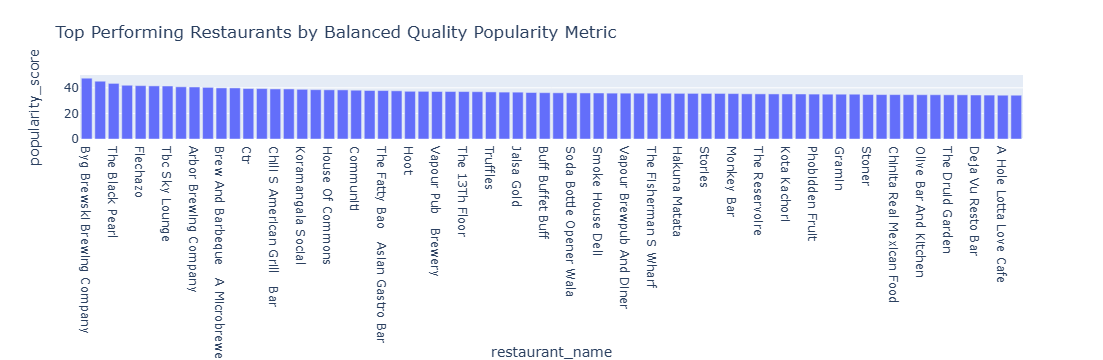

In [69]:
px.bar(score,x='restaurant_name',y='popularity_score',title="Top Performing Restaurants by Balanced Quality Popularity Metric")

<h2>Table Booking among top 1% restaurants</h2>

In [112]:
popular_score_df['table_booking'].head(70).value_counts()

table_booking
Yes    43
No     27
Name: count, dtype: int64

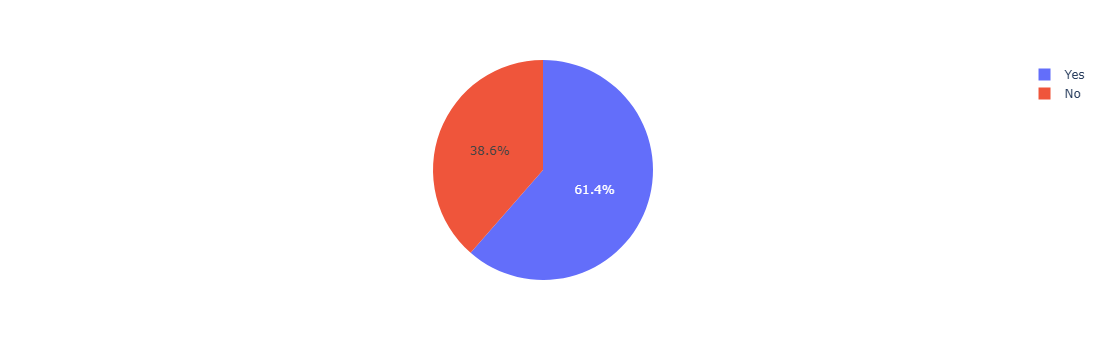

In [104]:
top_restaurants_tb=popular_score_df['table_booking'].head(70).value_counts()
px.pie(top_restaurants_tb,names=top_restaurants_tb.index,values=top_restaurants_tb.values)

<h2>Online Order service among top 1% restaurants</h2>

In [110]:
popular_score_df['online_order'].head(70).value_counts()

online_order
No     36
Yes    34
Name: count, dtype: int64

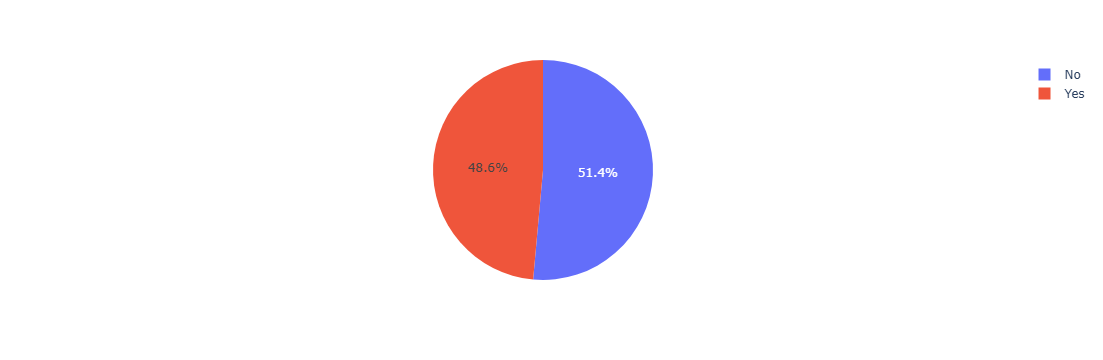

In [111]:
top_restaurants_onlineorder=popular_score_df['online_order'].head(70).value_counts()
px.pie(top_restaurants_onlineorder,names=top_restaurants_onlineorder.index,values=top_restaurants_onlineorder.values)

<h2>Top Cuisines(Considering balanced quality popularity metric result for top resaturants)</h2>

In [70]:
expanded_cuisines=score['cuisines_type'].str.split(',').explode().str.strip()
expanded_cuisines

1035      Continental
1035     North Indian
1035          Italian
1035     South Indian
1035      Finger Food
            ...      
85           American
85             Burger
85           Sandwich
85          Beverages
2072    Modern Indian
Name: cuisines_type, Length: 249, dtype: object

In [71]:
expanded_cuisines=score['cuisines_type'].str.split(',').explode().str.strip().reset_index(drop=True)  #Don't want old index as a column

expanded_cuisines.value_counts()    # ascending=false by default and sort=true means by values else by column name


cuisines_type
North Indian     38
Continental      28
Asian            18
American         17
Chinese          16
Italian          13
Salad            11
Thai              8
Bbq               8
Mediterranean     8
European          7
Pizza             7
Burger            7
Finger Food       7
South Indian      5
Cafe              4
Steak             4
Beverages         4
Momos             4
Mughlai           3
Vietnamese        3
Seafood           3
Mexican           2
Modern Indian     2
Burmese           2
Desserts          2
Malaysian         2
Japanese          2
Tea               1
Korean            1
Ice Cream         1
Rajasthani        1
Mithai            1
Street Food       1
Juices            1
Cantonese         1
Goan              1
Parsi             1
Sri Lankan        1
Fast Food         1
Tex-Mex           1
Sandwich          1
Name: count, dtype: int64

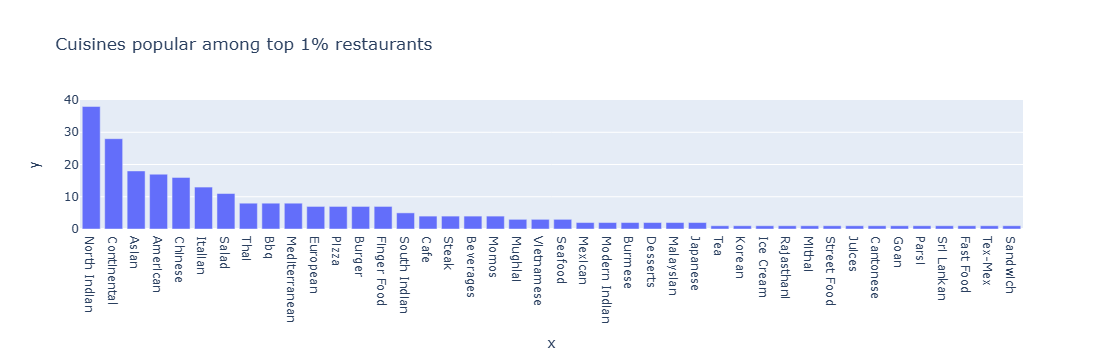

In [100]:
px.bar(expanded_cuisines.value_counts()    # ascending=false by default and sort=true means by values else by column name
,x=expanded_cuisines.value_counts()    
.index,y=expanded_cuisines.value_counts()  
.values,title="Cuisines popular among top 1% restaurants")

<h2>Top Restaurant types(Considering balanced quality popularity metric result for top resaturants)</h2>

In [96]:
expanded_restaurant_type=score['restaurant_type'].str.split(',').explode()
expanded_restaurant_type

1035     Microbrewery
6665     Microbrewery
6242    Casual Dining
6242              Bar
770               Pub
            ...      
1746              Pub
4501    Casual Dining
85               Cafe
2072    Casual Dining
2072     Microbrewery
Name: restaurant_type, Length: 105, dtype: object

In [97]:
expanded_restaurant_type=score['restaurant_type'].str.split(',').explode().str.strip().reset_index(drop=True)  #Don't want old index as a column

df_rest_type=expanded_restaurant_type.value_counts()    # ascending=false by default and sort=true means by values else by column name


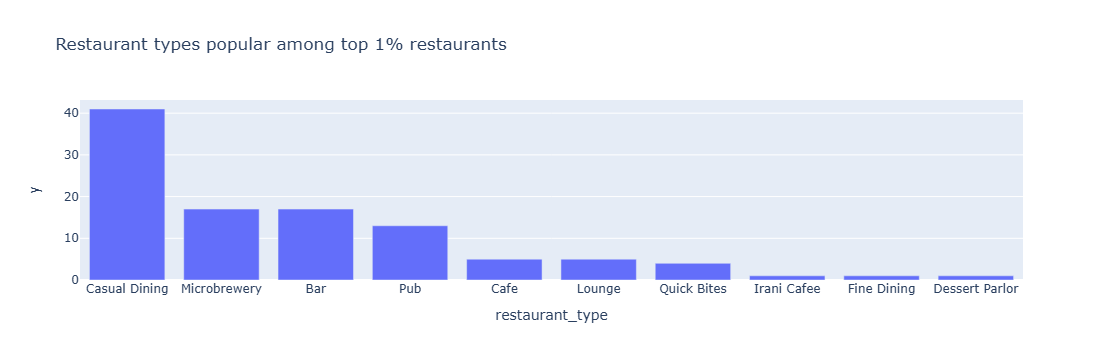

In [98]:
px.bar(df_rest_type,x=df_rest_type.index,y=df_rest_type.values,title="Restaurant types popular among top 1% restaurants")

<h2>Commonly Available Cuisines Types</h2>

In [131]:
df['cuisines_type'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts().head(20)

cuisines_type
North Indian    3237
Chinese         2438
South Indian    1464
Fast Food       1037
Biryani          929
Continental      738
Desserts         543
Beverages        533
Cafe             519
Street Food      394
Italian          383
Bakery           304
Andhra           292
Seafood          266
Mughlai          234
Pizza            221
Kerala           220
Rolls            190
Burger           189
Asian            178
Name: count, dtype: int64

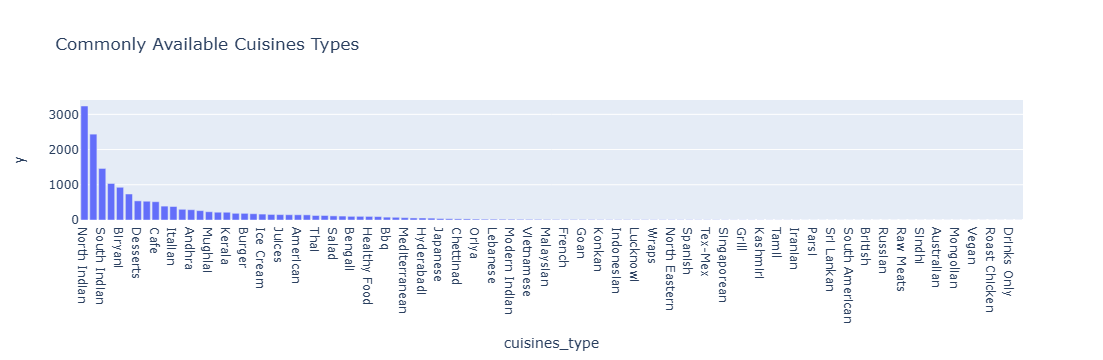

In [127]:
cuisines_type_counts = df['cuisines_type'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts()
cuisines_type_fig = px.bar(cuisines_type_counts, x=cuisines_type_counts.index, y=cuisines_type_counts.values, title='Commonly Available Cuisines Types')

cuisines_type_fig.show()

In [128]:
df['restaurant_type'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts()  #by default ascending=false 

restaurant_type
Quick Bites       3000
Casual Dining     1928
Delivery           647
Cafe               503
Takeaway           307
Dessert Parlor     298
Bar                279
Bakery             217
Beverage Shop      175
Food Court          96
Sweet Shop          91
Fine Dining         89
Pub                 88
Lounge              79
Mess                49
Microbrewery        46
Kiosk               36
Food Truck          19
Dhaba                7
Club                 6
Confectionery        2
Irani Cafee          1
Bhojanalya           1
Meat Shop            1
Name: count, dtype: int64

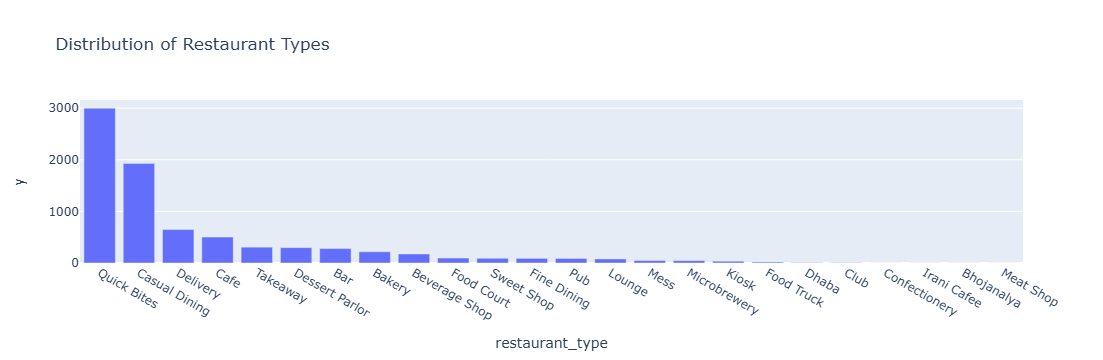

In [129]:
restaurant_type_counts = df['restaurant_type'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts() 
restaurant_type_fig = px.bar(restaurant_type_counts, x=restaurant_type_counts.index, y=restaurant_type_counts.values, title='Distribution of Restaurant Types')

restaurant_type_fig.show()

<h2>High Density Restaurants Areas</h2>

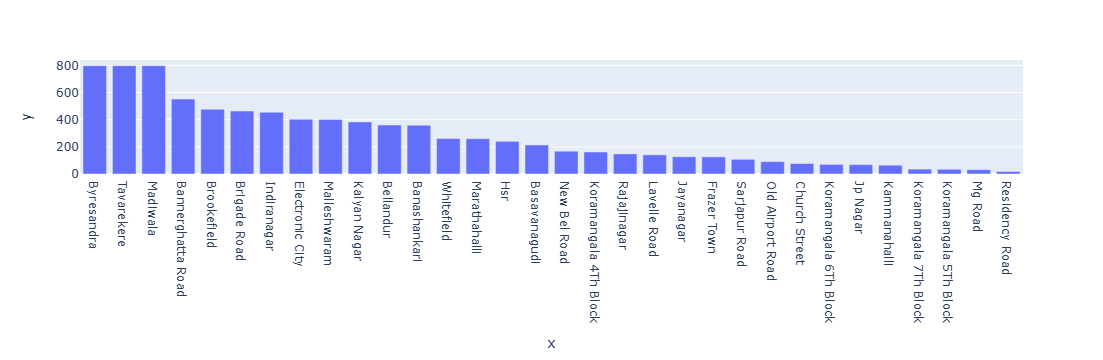

In [130]:
area_popularity=df['area'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts()

bar_plot_area=px.bar(df,x=area_popularity.index,y=area_popularity.values)
bar_plot_area.show()

In [81]:
score['area'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts()


area
Byresandra               15
Tavarekere               15
Madiwala                 15
Indiranagar              12
Brigade Road             10
Malleshwaram              5
Bellandur                 4
Hsr                       3
Koramangala 4Th Block     3
Marathahalli              3
Brookefield               2
Old Airport Road          2
Whitefield                2
Mg Road                   2
Bannerghatta Road         2
Lavelle Road              1
Banashankari              1
Jayanagar                 1
Sarjapur Road             1
New Bel Road              1
Name: count, dtype: int64

<h2>Popular Restaurant Areas</h2>

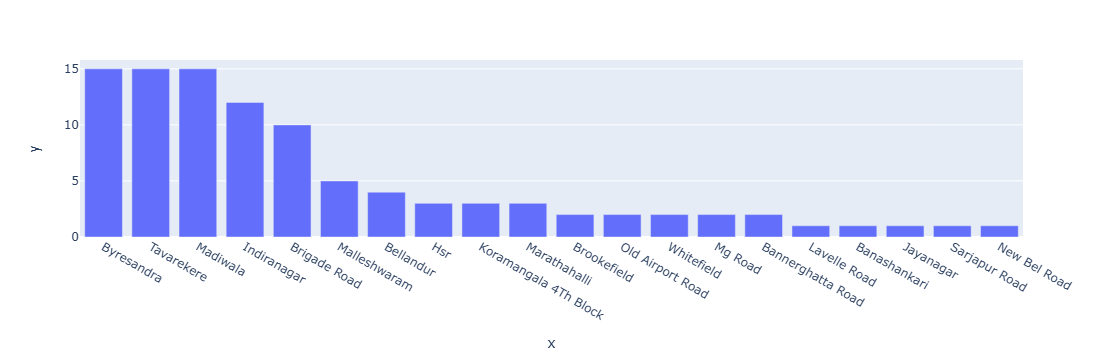

In [82]:
bar_plot_area_toprest=score['area'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts()

bar_plot_area_toprest=px.bar(score,x=bar_plot_area_toprest.index,y=bar_plot_area_toprest.values)
bar_plot_area_toprest.show()

<h2>High Restaurant Density Local Addresses</h2>

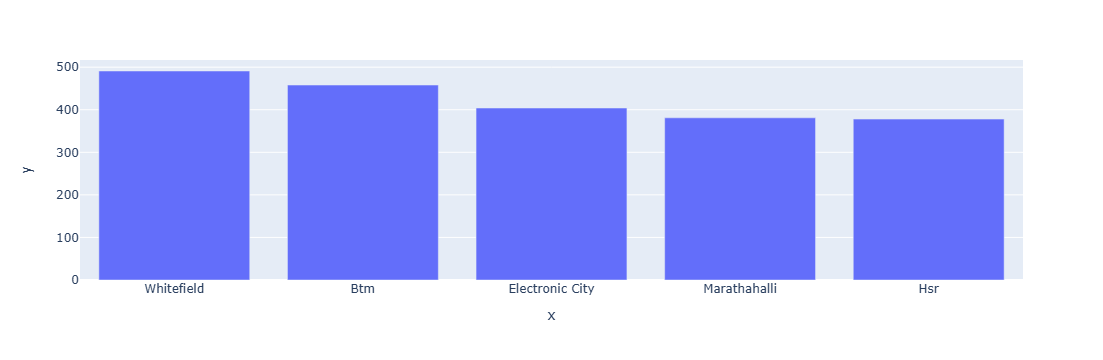

In [83]:
loc_popularity=df['local_address'].str.split(',').explode().str.strip().reset_index(drop=True).value_counts().head()
bar_plot_local_address=px.bar(df,x=loc_popularity.index,y=loc_popularity.values)
bar_plot_local_address.show()

<h2>2. Service Gap</h2>

In [84]:
df['table_booking'].value_counts()
table_booking_series=df['table_booking'].value_counts()

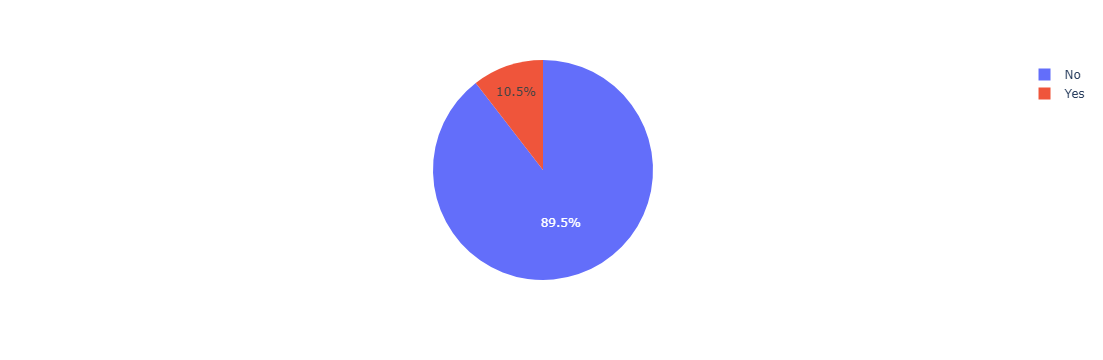

In [85]:
px.pie(table_booking_series,names=table_booking_series.index,values=table_booking_series.values)

In [86]:
df['online_order'].value_counts()
online_order_series=df['online_order'].value_counts()

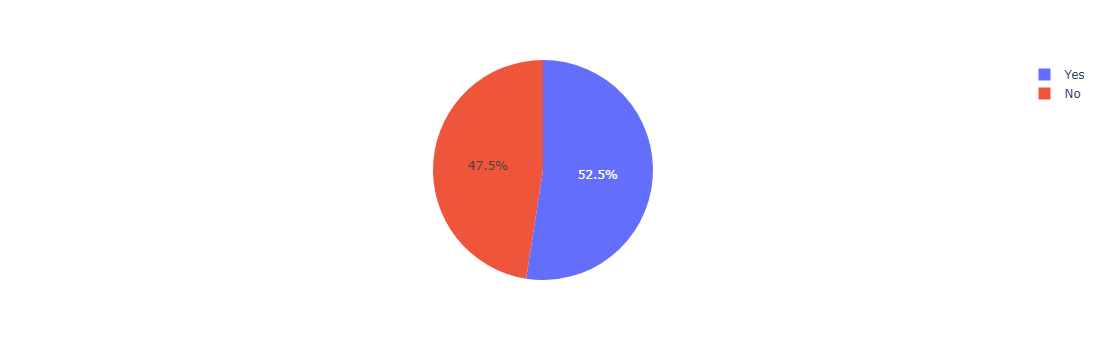

In [87]:
px.pie(online_order_series,names=online_order_series.index,values=online_order_series.values)

<h2>3. Cost Trends</h2>

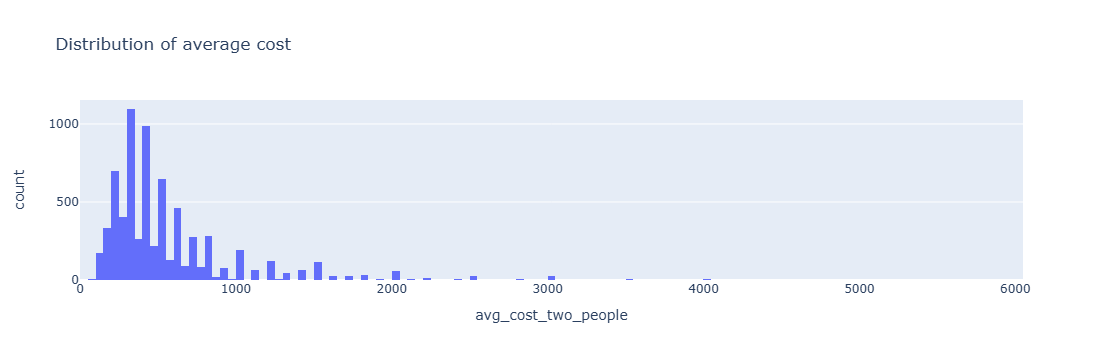

In [89]:
restaurant_type_fig = px.histogram(df, x='avg_cost_two_people', title='Distribution of average cost')
restaurant_type_fig.show()

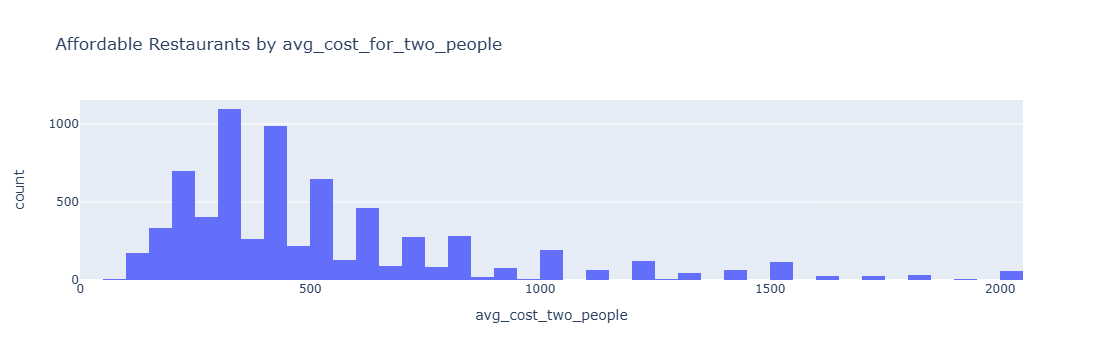

In [90]:
df_affordable_restaurants=df[df["avg_cost_two_people"]<=2000]
px.histogram(df_affordable_restaurants,x="avg_cost_two_people",title="Affordable Restaurants by avg_cost_for_two_people")

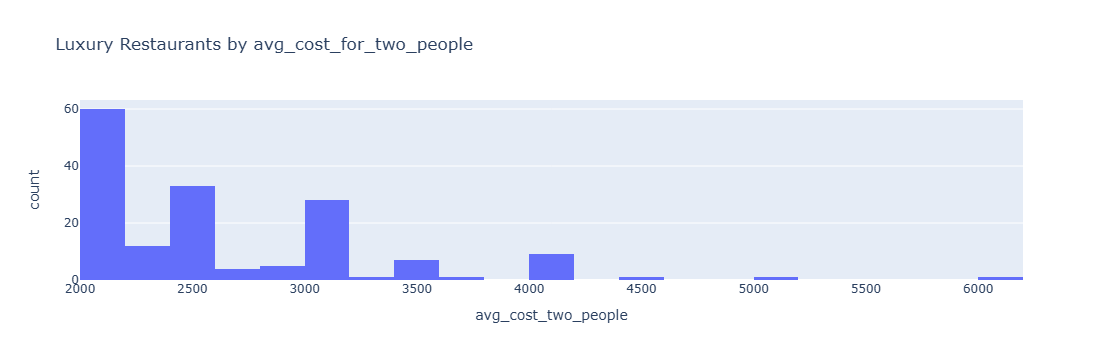

In [91]:
df_luxury_restaurants=df[df["avg_cost_two_people"]>=2000]
px.histogram(df_luxury_restaurants,x="avg_cost_two_people",title="Luxury Restaurants by avg_cost_for_two_people")

In [115]:
popular_score_df['avg_cost_two_people'].head(70)
popular_score_df['avg_cost_two_people'].head(70).value_counts()

avg_cost_two_people
1500.0    13
1400.0    10
1600.0     7
1300.0     6
1200.0     5
1800.0     4
150.0      3
600.0      3
1000.0     2
1100.0     2
2500.0     2
1700.0     2
900.0      2
550.0      1
2100.0     1
400.0      1
800.0      1
2800.0     1
2400.0     1
750.0      1
2000.0     1
2600.0     1
Name: count, dtype: int64

In [94]:
df['popularity_score'] = df['rate_out_of_5'] * np.log1p(df['num_of_ratings'])

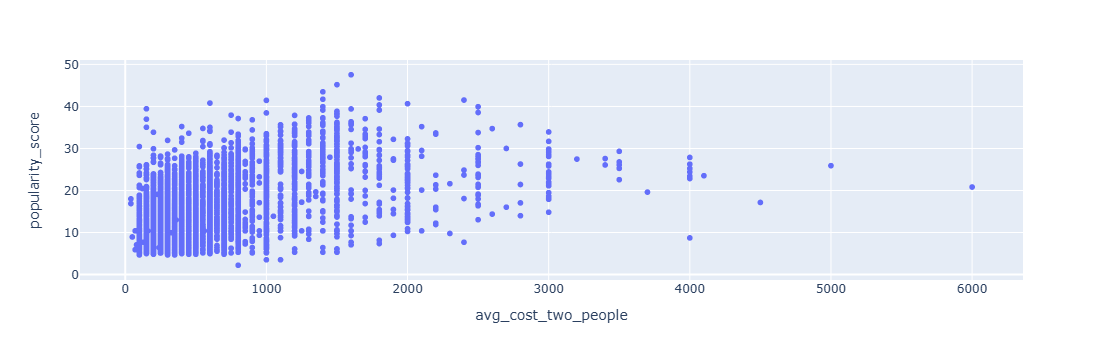

In [95]:
scatter_plot_cost_ratings=px.scatter(df,x='avg_cost_two_people',y='popularity_score')  #popularity variation with cost
scatter_plot_cost_ratings.show()